In [11]:
import pandas as pd
from os import listdir
from os.path import join
from scipy import stats
import matplotlib.pyplot as plt
from statistics import mean, stdev
import numpy as np
import random
from statistics import median
from statistics import mean
from statistics import mode
from os import listdir

store_dir = 'COCTR_multidimensional_ranking-master/rankedTrialsOnDifferentRelevancyBasedSchemes/3_RRF_Combined/'

In [3]:
input_path = "COCTR_multidimensional_ranking-master/rankedTrialsOnDifferentRelevancyBasedSchemes/2.1_synoymsWithoutIncExcRelevancySorted"
files = listdir(input_path)
numberOfTrialsInEachQueryList = []
for file in files:
    df = pd.read_csv(join(input_path, file))
    numberOfTrialsInEachQueryList.append(df.shape[0])
    
print(sorted(numberOfTrialsInEachQueryList))
print("Median:", median(numberOfTrialsInEachQueryList))
print("Mean:", mean(numberOfTrialsInEachQueryList))
print("Min:", min(numberOfTrialsInEachQueryList))
print("Max:", max(numberOfTrialsInEachQueryList))
# print("Mode:", mode(numberOfTrialsInEachQueryList))

[9, 12, 13, 15, 16, 17, 19, 23, 30, 36, 39, 39, 43, 45, 45, 53, 57, 67, 72, 95, 103, 193, 295, 311, 360]
Median: 43
Mean: 80.28
Min: 9
Max: 360


In [5]:
def plotbar(y, x_lab, y_lab, title):
    objects = ('Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25')
    y_mean = [np.median(y)]*len(y)
    
    y_pos = np.arange(len(objects))
    
    plt.figure(figsize=(15, 3))
    plt.bar(y_pos, y, align='center', alpha=0.5, color='b')
    
    plt.xticks(y_pos, objects)
    
    # Plot the average line
    plt.plot(y_pos, y_mean, label='Mean', linestyle='--')
    
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.title(title)
    
    plt.show()
    plt.savefig("Number of Trials At each Query")
    print("Median:", y_mean[0])

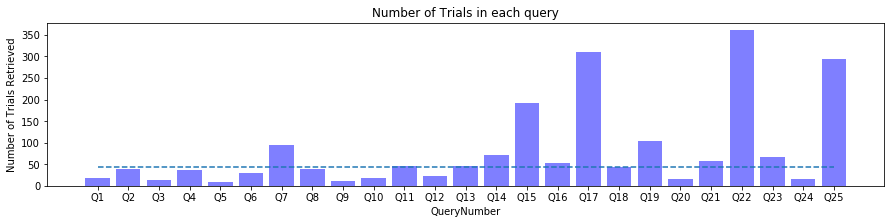

Median: 43.0


<Figure size 432x288 with 0 Axes>

In [6]:
plotbar(numberOfTrialsInEachQueryList, "QueryNumber", "Number of Trials Retrieved", "Number of Trials in each query")

In [19]:
for file in files:
#   print(file)
    df = pd.read_csv(join(input_path, file))

    df['tot_subj_affected'] = df['tot_subj_affected'].fillna(value=0)
    df['citationSum'] = df['citationSum'].fillna(value=0)

#   rel_index = df.sort_values(by=['brief_summary_matched_count', 'official_title_matched_count', 'brief_title_matched_count', 'briefTitleAndSummaryCombinedPageRankScore'], ascending=[False, False, False, False]).index.tolist()
    rel_index = df.index.tolist()
    num_retrieved_trials = len(rel_index)

    df_a = df.sample(frac=1.0, random_state=50)
    adv_index = df_a.sort_values(by=['tot_subj_affected', 'briefTitleAndSummaryCombinedPageRankScore'], ascending=[True, False]).index.tolist()
    rec_index = df.sort_values(by=['CompletionDate'], ascending=[False]).index.tolist()
    pop_index_sum = df.sort_values(by=['citationSum'], ascending=[False]).index.tolist()
    pop_index_avg = df.sort_values(by=['citationAvg'], ascending=[False]).index.tolist()
    
    rank_fusion_score = list()
    rank_fusion_not_recency_score = list()
    k_const = min(len(rel_index), 60)
    
    for list_ind in range(len(rel_index)):
        sum_score = 1/(k_const + rel_index[list_ind] + 1) + 1/(k_const + adv_index[list_ind] + 1) + 1/(k_const + rec_index[list_ind] + 1) + 1/(k_const + pop_index_sum[list_ind] + 1)
        rank_fusion_score.append(sum_score)
        sum_some_score = 1/(k_const + rel_index[list_ind] + 1) + 1/(k_const + adv_index[list_ind] + 1) + 1/(k_const + pop_index_sum[list_ind] + 1)
        rank_fusion_not_recency_score.append(sum_some_score)
    
    df['RRFscore_all_aspects'] = rank_fusion_score
    df['RRFscore_not_recency'] = rank_fusion_not_recency_score
    
    
    df_fused_index = df.sort_values(by=['RRFscore_all_aspects'], ascending=[False]).index.tolist()
    df_fused_not_recency_index = df.sort_values(by=['RRFscore_not_recency'], ascending=[False]).index.tolist()
    
    print('Query name: ', file)
    print('Ground truth relevance: ', df['relevance'].tolist())
    print('Relevancy: ', rel_index)
    print('Adversity: ', adv_index)
    print('Recency: ', rec_index)
    print('Popularity: ', pop_index_sum)
    print('Combined RRF All Aspects: ', df_fused_index)
    print('Combined RRF Not recency: ', df_fused_not_recency_index)
    
    df_fused = df.sort_values(by=['RRFscore_all_aspects'], ascending=[False])
    df_fused.to_csv(join(store_dir, file), index=False)


Query name:  already having Celiac Disease_page_rank.csv
Ground truth relevance:  [1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]
Relevancy:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
Adversity:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
Recency:  [5, 18, 13, 17, 15, 4, 8, 9, 10, 6, 14, 2, 7, 3, 12, 1, 0, 16, 11]
Popularity:  [11, 14, 4, 0, 1, 3, 2, 12, 6, 9, 5, 17, 16, 7, 13, 18, 15, 10, 8]
Combined RRF All Aspects:  [0, 5, 3, 2, 4, 6, 1, 8, 9, 13, 7, 11, 10, 16, 15, 12, 18, 14, 17]
Combined RRF Not recency:  [3, 2, 0, 4, 1, 5, 6, 8, 10, 7, 9, 13, 11, 12, 14, 18, 17, 16, 15]
Query name:  antiretroviral therapy first time_pageRank.csv
Ground truth relevance:  [1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Relevancy:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,

Query name:  HIV infection Treatment naive_page_rank.csv
Ground truth relevance:  [0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0]
Relevancy:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Adversity:  [2, 4, 0, 5, 6, 7, 9, 10, 11, 3, 1, 8]
Recency:  [3, 0, 2, 6, 1, 10, 8, 9, 5, 11, 4, 7]
Popularity:  [4, 11, 3, 5, 10, 8, 9, 1, 2, 0, 6, 7]
Combined RRF All Aspects:  [2, 0, 1, 9, 10, 4, 3, 8, 7, 5, 6, 11]
Combined RRF Not recency:  [2, 0, 9, 3, 1, 10, 7, 8, 4, 5, 6, 11]
Query name:  Hypercholesterolemia safe treatments_page_rank.csv
Ground truth relevance:  [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1]
Relevancy:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
Adversity:  [7, 8, 11, 12, 13, 14, 15, 16, 10, 2, 5, 4, 3, 0, 6, 9, 1]
Recency:  [3, 5, 15, 14, 11, 1, 0, 2, 16, 4, 6, 13, 9, 12, 10, 8, 7]
Popularity:  [1, 4, 0, 6, 12, 16, 8, 5, 9, 7, 10, 3, 11, 2, 13, 14, 15]
Combined RRF All Aspects:  [0, 1, 9, 13, 2, 6, 7, 11, 5, 10, 3, 12, 16, 4, 14, 8, 15]
Combined RRF Not recency:  [0, 2, 13

Query name:  postoperative delirium_pageRank.csv
Ground truth relevance:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Relevancy:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
Adversity:  [9, 16, 11, 18, 5, 19, 20, 21, 22, 23, 24, 25, 26, 27, 17, 7, 28, 29, 30, 31, 32, 12, 34, 35, 0, 1, 37, 2, 38, 39, 8, 3, 40, 14, 4, 41, 10, 42, 15, 6, 36, 13, 33]
Recency:  [22, 5, 11, 37, 41, 4, 35, 13, 2, 36, 29, 34, 28, 7, 39, 23, 12, 3, 42, 21, 9, 6, 33, 1, 16, 38, 20, 17, 18, 25, 40, 14, 19, 30, 26, 8, 24, 32, 15, 0, 27, 10, 31]
Popularity:  [39, 24, 27, 36, 26, 30, 15, 32, 20, 0, 40, 13, 2, 19, 31, 33, 8, 29, 6, 25, 18, 21, 14, 10, 42, 35, 28, 23, 11, 38, 37, 22, 16, 12, 7, 34, 5, 17, 1, 4, 3, 41, 9]
Combined RRF All Aspects:  [39, 1, 2, 8, 5, 9, 0, 21, 23, 38, 12, 16, 34, 4, 27, 13, 31, 36, 24, 

Query name:  treating people already having hypertension_page_rank.csv
Ground truth relevance:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0]
Relevancy:  [0, 1,